We study the changes in the number of candidate nodes that are obtained when the parameters are varied

### Loading Data

In [1]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))

metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))

saveDir <- "../environment/mouseMuscle"
clustFile <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/no_threshold0/cluster_nwk.txt"

tseCons <- beaveR::buildTSE(treeTermFile = clustFile, coldata = colData)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'


The following object is masked from 'package:dplyr':

    select


loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE

Missing txps 2380

Aggregation Started

Aggregation Ended



#### Loading trenDi data with default parameters

In [2]:
load(file.path(saveDir, "trenDiRes.RData"))
defaultNodes <- lapply(trenDiRes, function(x) x[["candNodes"]])
sapply(defaultNodes, length)
defaultTxps <- sapply(defaultNodes, function(x) unlist(Descendants(treeCons, x)))
sapply(defaultTxps, length)

[1]  3711  7693 10458

[1]  5951 11907 15878

#### Loading trenDi results with changing parameters

In [3]:
load(file.path(saveDir, "trenDiResPar.RData"))
length(trenDiResPar)

[1] 16

##### Extracting nodes

In [6]:
minPNodes <- lapply(trenDiResPar[1:6], function(x) {
    nodes <- lapply(x, function(nn) nn[["candNodes"]])
})
minPTxps <- lapply(minPNodes, function(nn) {
    ll <- lapply(nn, function(x) unlist(Descendants(treeCons, x)))
    ll
})
mirvNodes <- lapply(trenDiResPar[c(7,9,11:16)], function(x) {
    nodes <- lapply(x, function(nn) nn[["candNodes"]])
})
mirvTxps <- lapply(mirvNodes, function(nn) {
    ll <- lapply(nn, function(x) unlist(Descendants(treeCons, x)))
    ll
})

In [7]:
sapply(minPNodes, function(x) {
    ll <- sapply(x, length)
})
sapply(mirvNodes, function(x) {
    ll <- sapply(x, length)
})
rowMeans(sapply(minPNodes, function(x) {
    ll <- sapply(x, length)
}))
rowSds(sapply(minPNodes, function(x) {
    ll <- sapply(x, length)
}))
rowMeans(sapply(mirvNodes, function(x) {
    ll <- sapply(x, length)
}))
rowSds(sapply(mirvNodes, function(x) {
    ll <- sapply(x, length)
}))

minP=0.6,minP=0.65,minP=0.75,minP=0.8,minP=0.85,minP=0.9
3681,3697,3724,3732,3742,3752
7665,7686,7707,7713,7716,7718
10432,10445,10459,10471,10475,10469


mirvThresh=0.2,mirvThresh=0.3,mirvThresh=0.5,mirvThresh=0.6,mirvThresh=0.7,mirvThresh=0.8,mirvThresh=0.9,mirvThresh=1
3738,3713,3695,3683,3666,3644,3629,3620
7710,7694,7673,7651,7635,7615,7609,7597
10440,10454,10446,10437,10424,10418,10408,10393


[1]  3721.333  7700.833 10458.500

[1] 27.22989 21.04677 16.87306

[1]  3673.5  7648.0 10427.5

[1] 41.47633 41.35905 20.57738

#### Finding intersection

##### Nodes

In [6]:
sapply(defaultNodes, length)
sapply(minPNodes, function(minP) {
    mapply(function(x,y) length(intersect(x,y)), minP, defaultNodes)
})
sapply(mirvNodes, function(minP) {
    mapply(function(x,y) length(intersect(x,y)), minP, defaultNodes)
})


[1]  3711  7693 10458

minP=0.6,minP=0.65,minP=0.75,minP=0.8,minP=0.85,minP=0.9
3625,3667,3691,3672,3654,3632
7520,7610,7620,7566,7510,7438
10209,10339,10346,10269,10186,10086


mirvThresh=0.2,mirvThresh=0.25,mirvThresh=0.3,mirvThresh=0.35,mirvThresh=0.5,mirvThresh=0.6,mirvThresh=0.7,mirvThresh=0.8,mirvThresh=0.9,mirvThresh=1
3239,3395,3517,3634,3568,3471,3395,3335,3288,3247
6806,7103,7332,7533,7428,7248,7097,6976,6887,6811
9306,9690,9991,10243,10114,9885,9701,9552,9438,9332


##### Txps

In [7]:
sapply(defaultTxps, length)
sapply(minPTxps, function(minP) {
    mapply(function(x,y) length(intersect(x,y)), minP, defaultTxps)
})
sapply(mirvTxps, function(minP) {
    mapply(function(x,y) length(intersect(x,y)), minP, defaultTxps)
})


[1]  5951 11907 15878

minP=0.6,minP=0.65,minP=0.75,minP=0.8,minP=0.85,minP=0.9
5733,5843,5951,5951,5951,5951
11523,11732,11907,11907,11907,11907
15309,15608,15878,15878,15878,15878


mirvThresh=0.2,mirvThresh=0.25,mirvThresh=0.3,mirvThresh=0.35,mirvThresh=0.5,mirvThresh=0.6,mirvThresh=0.7,mirvThresh=0.8,mirvThresh=0.9,mirvThresh=1
5951,5951,5951,5951,5720,5564,5423,5296,5197,5100
11907,11907,11907,11907,11505,11219,10953,10728,10576,10408
15878,15878,15878,15878,15382,15043,14724,14476,14275,14038


### Computing Distance

In [8]:
## Idea distance is difference in heights between ancestor and descendant
## If the node is in a different branch, then distance is the difference between node and root + 1
### n2 is the default nodes
compNodes <- function(n1, n2, tree) {
    diffNodes <- setdiff(n1, n2) ## unique to n1
    desc <- Descendants(treeCons, diffNodes, "all")
    anc <- Ancestors(treeCons, diffNodes, "all")
    descMatch <- rep(NA, length(diffNodes))
    ancMatch <- rep(NA, length(diffNodes))
    for(i in seq_along(desc)) {
        mInd <- match(desc[[i]], n2)
        if(sum(!is.na(mInd))>0)
            descMatch[i] <- n2[mInd[!is.na(mInd)][1]]
    }
    for(i in seq_along(anc)) {
        mInd <- match(anc[[i]], n2)
        if(sum(!is.na(mInd))>0)
            ancMatch[i] <- n2[mInd[!is.na(mInd)]]
    }

    ### Want to ensure the nodes that are not NA in anc and desc are not same
    reqNodes <- rep(c(NA, length(diffNodes)))
    if(sum(!is.na(ancMatch))==0) {
        reqNodes <- descMatch
    }
    else if(sum(!is.na(descMatch))==0) {
        reqNodes <- ancMatch
    }
    ### Now we know that both anc and desc have some nodes that are not NA
    else {
        ## we want to ensure that is not NA is anc is also not NA in desc
         if(sum(!is.na(ancMatch) == !is.na(descMatch)) != 0)
             stop("pairs in both directions")
         reqNodes[!is.na(ancMatch)] <- ancMatch[!is.na(ancMatch)]
         reqNodes[!is.na(descMatch)] <- ancMatch[!is.na(descMatch)]
    }
    
    ### Computing distance between the nodes
    ### For the common nodes distance is 0
    ### For the nodes with ancestors or descendants distance is distance b/w them
    ### For the others is the distance from root + 1
    distNodes <- rep(0, length(n1))
    notNA <- which(!is.na(reqNodes))
    na <- which(is.na(reqNodes))
    distNodes[match(diffNodes[notNA], n1)] <- abs(node.depth(tree, 2)[diffNodes[notNA]] - node.depth(tree, 2)[reqNodes[notNA]])
    distNodes[match(diffNodes[na], n1)] <- abs(node.depth(tree, 2)[length(tree$tip)+1] - node.depth(tree, 2)[diffNodes[na]])+1
    return(list(diffNodes, descMatch, ancMatch, distNodes, sum(distNodes)/length(n1)))
    
}
### Go with 

In [9]:
distminP <- lapply(minPNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) compNodes(n1 = nodes[[i]], n2 = defaultNodes[[i]], treeCons)[[5]])
})

In [10]:
df <- data.frame(distminP)
head(df)

,minP.0.6,minP.0.65,minP.0.75,minP.0.8,minP.0.85,minP.0.9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02798153,0.01622938,0.26423201,0.4056806,0.6095671,0.8006397
2,0.03796477,0.02003643,0.16322823,0.2417996,0.3230949,0.4140969
3,0.04562883,0.02106271,0.08891863,0.1930093,0.2631981,0.3228580


In [11]:
dfMinP <- pivot_longer(df, cols = starts_with("minP"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
)
dfMinP <- dfMinP %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("minP.", "", Threshold))
dfMinP

Threshold,Distance,FDR,Thresh
<chr>,<dbl>,<fct>,<chr>
minP.0.6,0.02798153,0.01,0.6
minP.0.65,0.01622938,0.01,0.65
minP.0.75,0.26423201,0.01,0.75
minP.0.8,0.40568060,0.01,0.8
minP.0.85,0.60956708,0.01,0.85
minP.0.9,0.80063966,0.01,0.9
minP.0.6,0.03796477,0.05,0.6
minP.0.65,0.02003643,0.05,0.65
minP.0.75,0.16322823,0.05,0.75


In [12]:
size <- 18
pMinP <- ggplot(dfMinP, aes(x = Thresh, y = Distance, color = factor(FDR), shape = FDR)) +
    geom_point(size=5) +
    theme_bw() +
    labs(title = "Distance between the nodes obtained at default threshold \n and varying minP",
        color = "Nominal FDR",
        shape = "Nominal FDR",
        x="minP") +
    theme(plot.title = element_text(size = size - 1),
        axis.text = element_text(size = size),
        axis.title = element_text(size = size),
        legend.text = element_text(size = size),
        legend.title = element_text(size = size),
        legend.position = "bottom") +
    guides(fill = "none")

In [13]:
distmirv <- lapply(mirvNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) compNodes(n1 = nodes[[i]], n2 = defaultNodes[[i]], treeCons)[[5]])
})
df <- data.frame(distmirv)
dfMirv <- pivot_longer(df, cols = starts_with("mirv"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
)
dfMirv <- dfMirv %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("mirvThresh.", "", Threshold))
dfMirv

Threshold,Distance,FDR,Thresh
<chr>,<dbl>,<fct>,<chr>
mirvThresh.0.2,1.18485821,0.01,0.2
mirvThresh.0.3,0.33450040,0.01,0.3
mirvThresh.0.5,0.05087957,0.01,0.5
mirvThresh.0.6,0.08417051,0.01,0.6
mirvThresh.0.7,0.10883797,0.01,0.7
mirvThresh.0.8,0.12431394,0.01,0.8
mirvThresh.0.9,0.13722789,0.01,0.9
mirvThresh.1,0.15607735,0.01,1
mirvThresh.0.2,0.86822309,0.05,0.2


In [14]:
size <- 18
pMirv <- ggplot(dfMirv, aes(x = Thresh, y = Distance, color = FDR, shape = FDR)) +
    geom_point(size=5) +
    theme_bw() +
    labs(title = "Distance between the nodes obtained at default threshold \n and varying mIRV",
        color = "Nominal FDR",
        shape = "Nominal FDR",
        x="mIRV") +
    theme(plot.title = element_text(size = size - 1),
        axis.text = element_text(size = size),
        axis.title = element_text(size = size),
        legend.text = element_text(size = size),
        legend.title = element_text(size = size),
        legend.position = "bottom") +
    guides(fill = "none")

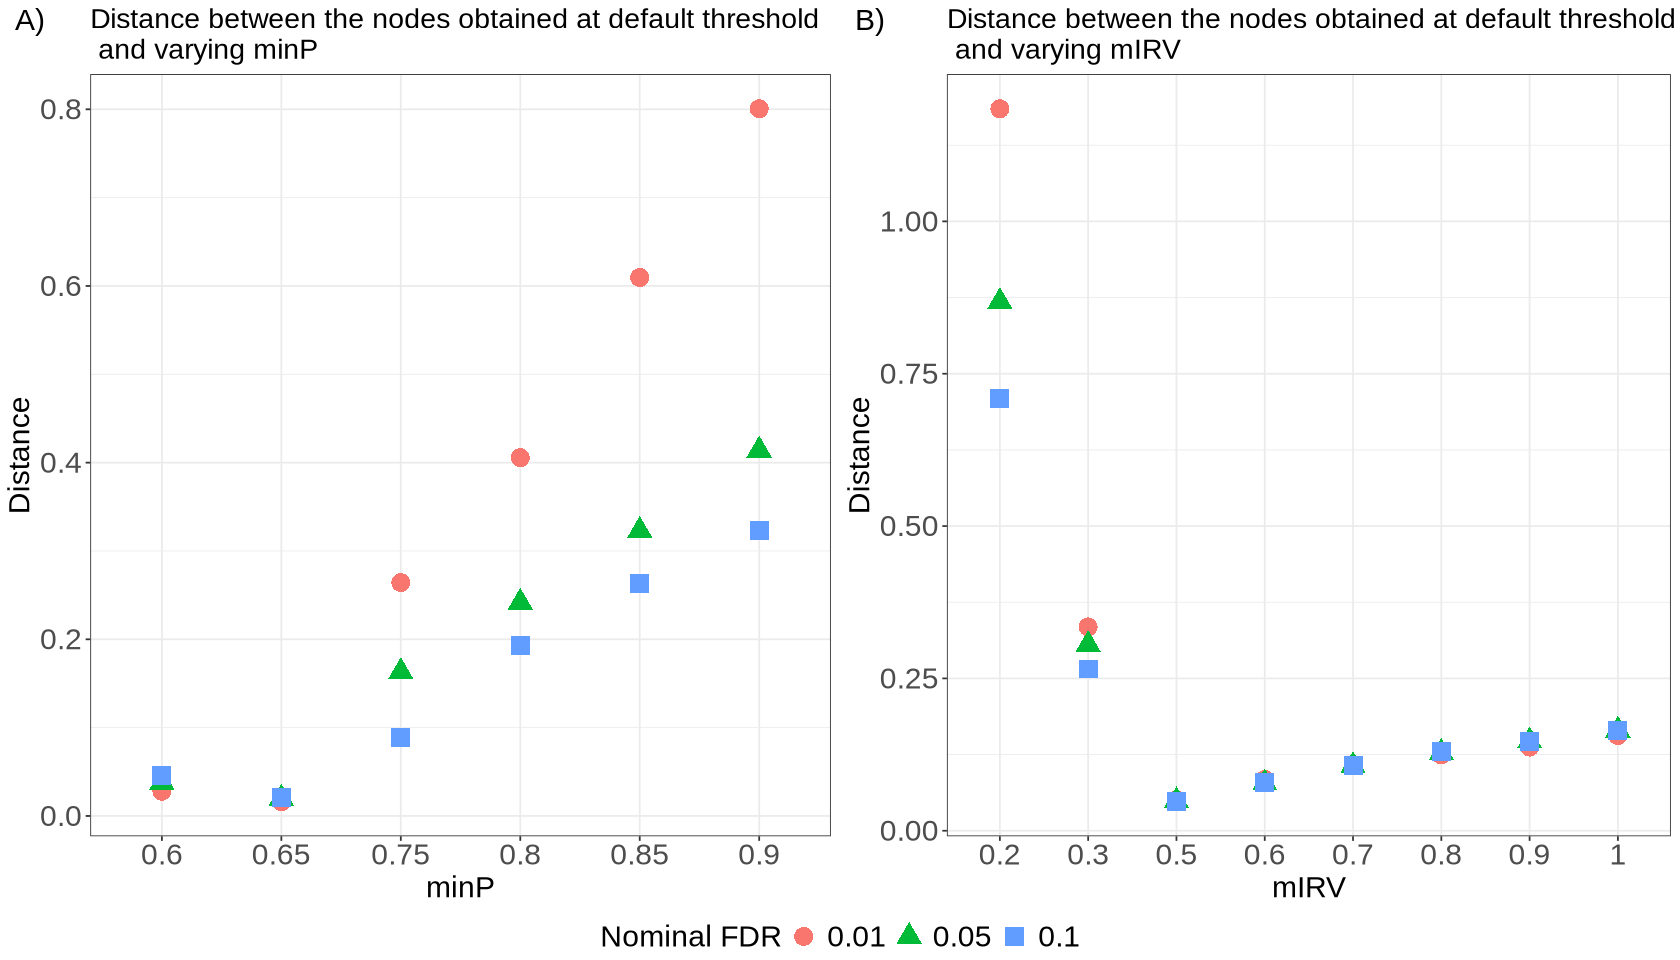

In [15]:
options(repr.plot.width=14, repr.plot.height=8)
ggarrange(pMinP, pMirv, common.legend = T, legend = "bottom", labels = c("A)", "B)"),
         font.label=list(size=size, face="plain"), hjust=-0.5)

In [33]:
distminP2 <- lapply(minPNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) compNodes(n2 = nodes[[i]], n1= defaultNodes[[i]], treeCons)[[5]])
})

In [37]:
distminP2

$`minP=0.6`
[1] 0.5545675 0.3306902 0.3145917

$`minP=0.65`
[1] 0.2718944 0.1234889 0.1616944

$`minP=0.75`
[1] 0.01131770 0.01702847 0.02046280

$`minP=0.8`
[1] 0.01913231 0.03093722 0.03509275

$`minP=0.85`
[1] 0.02883320 0.05069544 0.05345190

$`minP=0.9`
[1] 0.03880356 0.07097361 0.07659208

In [38]:
df <- data.frame(distminP2)
dfMinP <- pivot_longer(df, cols = starts_with("minP"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
)
dfMinP <- dfMinP %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("minP.", "", Threshold))
size <- 18
# pMinP <- ggplot(dfMinP, aes(x = Thresh, y = Distance, color = factor(FDR), shape = FDR)) +
#     geom_point(size=5) +
#     theme_bw() +
#     labs(title = "Distance between the nodes obtained at default threshold \n and varying minP",
#         color = "Nominal FDR",
#         shape = "Nominal FDR",
#         x="minP") +
#     theme(plot.title = element_text(size = size - 1),
#         axis.text = element_text(size = size),
#         axis.title = element_text(size = size),
#         legend.text = element_text(size = size),
#         legend.title = element_text(size = size),
#         legend.position = "bottom") +
#     guides(fill = "none")

In [36]:
distmirv2 <- lapply(mirvNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) compNodes(n2 = nodes[[i]], n1 = defaultNodes[[i]], treeCons)[[5]])
})
distmirv2
dfMirv <- pivot_longer(df, cols = starts_with("mirv"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
)
dfMirv <- dfMirv %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("mirvThresh.", "", Threshold))
size <- 18
pMirv <- ggplot(dfMirv, aes(x = Thresh, y = Distance, color = FDR, shape = FDR)) +
    geom_point(size=5) +
    theme_bw() +
    labs(title = "Distance between the nodes obtained at default threshold \n and varying mIrvThresh",
        color = "Nominal FDR",
        shape = "Nominal FDR",
        x="mIrvThresh") +
    theme(plot.title = element_text(size = size - 1),
        axis.text = element_text(size = size),
        axis.title = element_text(size = size),
        legend.text = element_text(size = size),
        legend.title = element_text(size = size),
        legend.position = "bottom") +
    guides(fill = "none")

$`mirvThresh=0.2`
[1] 0.1988682 0.1823736 0.1814879

$`mirvThresh=0.3`
[1] 0.07140932 0.06707396 0.06377893

$`mirvThresh=0.5`
[1] 0.4543250 0.3526583 0.2636259

$`mirvThresh=0.6`
[1] 0.7405012 0.6443520 0.4437751

$`mirvThresh=0.7`
[1] 1.1064403 0.8704017 0.6206732

$`mirvThresh=0.8`
[1] 1.498518 1.103081 0.748996

$`mirvThresh=0.9`
[1] 1.7679871 1.2105810 0.8675655

$`mirvThresh=1`
[1] 1.974939 1.373846 1.015586

ERROR: [1m[33mError[39m in `pivot_longer()`:[22m
[1m[22m[33m![39m `cols` must select at least one column.


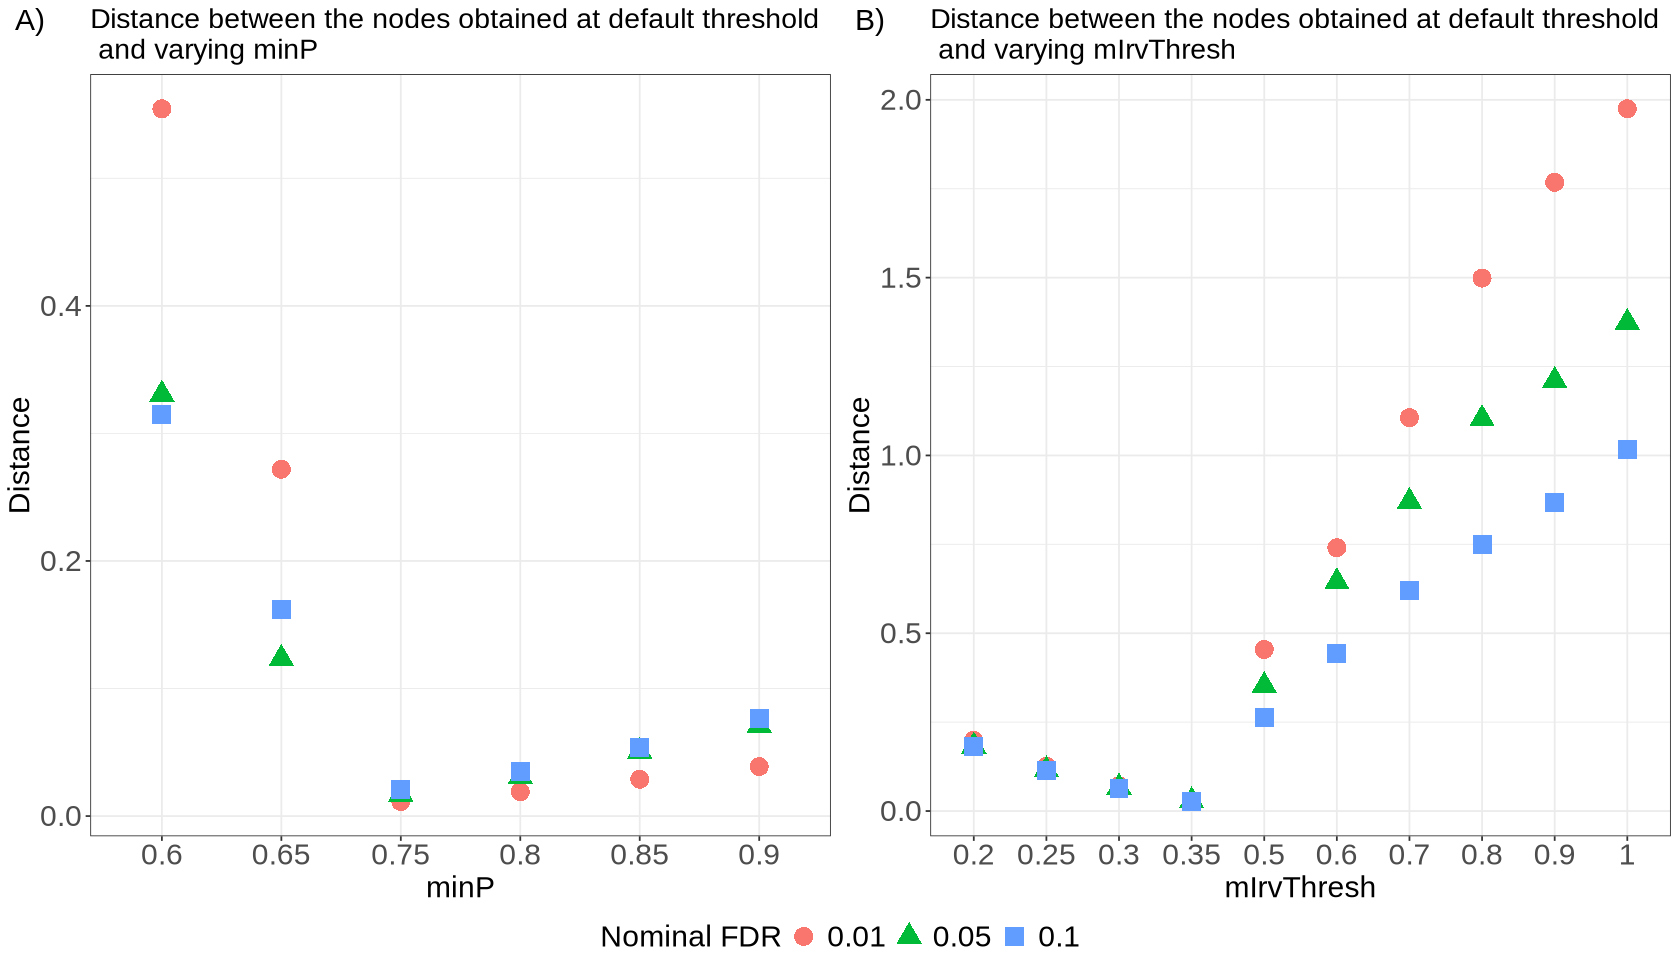

In [16]:
options(repr.plot.width=14, repr.plot.height=8)
ggarrange(pMinP, pMirv, common.legend = T, legend = "bottom", labels = c("A)", "B)"),
         font.label=list(size=size, face="plain"), hjust=-0.5)

In [30]:
distminP <- lapply(minPNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) {
        d1 <- compNodes(n1 = nodes[[i]], n2 = defaultNodes[[i]], treeCons)[[5]]
        d2 <- compNodes(n2 = nodes[[i]], n1 = defaultNodes[[i]], treeCons)[[5]]
        (d1+d2)/2
    })
})

In [40]:
df <- data.frame(distminP)
dfMinP <- pivot_longer(df, cols = starts_with("minP"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
)
dfMinP <- dfMinP %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("minP.", "", Threshold))
size <- 18
pMinP <- ggplot(dfMinP, aes(x = Thresh, y = Distance, color = factor(FDR), shape = FDR)) +
    geom_point(size=5) +
    theme_bw() +
    labs(title = "Distance between the nodes obtained at default threshold \n and varying minP",
        color = "Nominal FDR",
        shape = "Nominal FDR",
        x="minP") +
    theme(plot.title = element_text(size = size - 1),
        axis.text = element_text(size = size),
        axis.title = element_text(size = size),
        legend.text = element_text(size = size),
        legend.title = element_text(size = size),
        legend.position = "bottom") +
    guides(fill = "none")

In [19]:
distmirv <- lapply(mirvNodes, function(nodes) {
    sapply(seq_along(nodes), function(i) {
        d1 <- compNodes(n1 = nodes[[i]], n2 = defaultNodes[[i]], treeCons)[[5]]
        d2 <- compNodes(n2 = nodes[[i]], n1 = defaultNodes[[i]], treeCons)[[5]]
        (d1+d2)/2
    })
})

In [41]:
size <- 18
df <- data.frame(distmirv)

dfMirv <- pivot_longer(df, cols = starts_with("mirv"), # select columns starting with "day"
                        names_to = "Threshold", # new column for day labels
                        values_to = "Distance" # new column for values
                        )
dfMirv <- dfMirv %>% mutate(FDR=factor(rep(c(0.01, 0.05, 0.1), each = ncol(df))),
                           Thresh = gsub("mirvThresh.", "", Threshold))

pMirv <- ggplot(dfMirv, aes(x = Thresh, y = Distance, color = FDR, shape = FDR)) +
    geom_point(size=5) +
    theme_bw() +
    labs(title = "Distance between the nodes obtained at default threshold \n and varying mIrvThresh",
        color = "Nominal FDR",
        shape = "Nominal FDR",
        x="mIrvThresh") +
    theme(plot.title = element_text(size = size - 1),
        axis.text = element_text(size = size),
        axis.title = element_text(size = size),
        legend.text = element_text(size = size),
        legend.title = element_text(size = size),
        legend.position = "bottom") +
    guides(fill = "none")

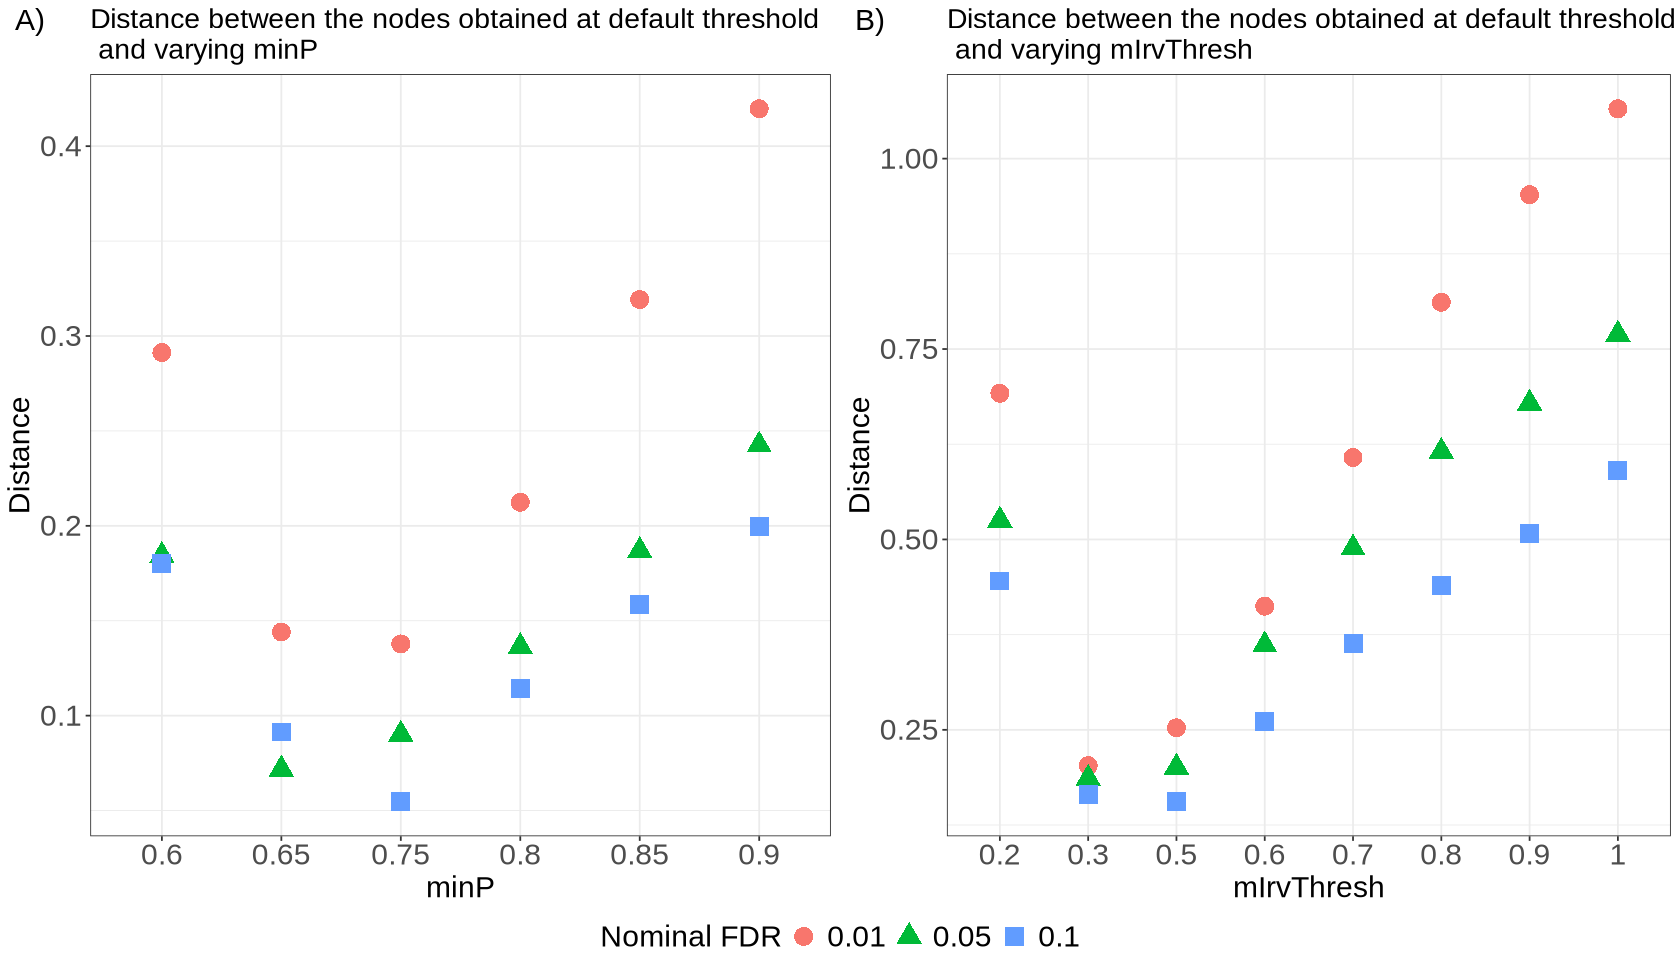

In [42]:
options(repr.plot.width=14, repr.plot.height=8)
ggarrange(pMinP, pMirv, common.legend = T, legend = "bottom", labels = c("A)", "B)"),
         font.label=list(size=size, face="plain"), hjust=-0.5)